### Groupe ENERGIE : Pylot_NRJ

### DATA CLEANING  PARTIE I

Objectif : Constater le phasage entre la consommation et la production énergétique au niveau national et au niveau départemental (risque de black out notamment)
-       Analyse au niveau départemental pour en déduire une prévision de consommation
-       Analyse par filière de production : énergie nucléaire / renouvelable
-       Focus sur les énergies renouvelables (où sont elles implantées)
La source de données est celle de l’ODRE (Open Data Réseaux Energies) : on a accès à toutes les informations de conso et production par filière jour par jour (toutes les 1/2 heure) depuis 2013.

Data 

https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature&sort=-date_heure


Conditions de validation du projet

-Exploration des données

-Dataviz’

-Rapport et codes

-Démo sur un cas actuel et conclusions.

-Approfondissement possible avec le volet DE correspondant.




# Import modules et librairies

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

df=pd.read_csv('Pylot_NRJ.csv', sep=';')

  Ce jeu de données, rafraîchi une fois par jour, présente les données régionales consolidées depuis janvier 2021 et définitives (de janvier 2013 à décembre 2020) issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. Les données sont dites consolidées lorsqu'elles ont été vérifiées et complétées (livraison en milieu de M+1). Elles deviennent définitives lorsque tous les partenaires ont transmis et vérifié l'ensemble des comptages, (livraison deuxième trimestre A+1).

Vous y trouverez au pas demi-heure:

    La consommation réalisée.
    La production selon les différentes filières composant le mix énergétique.
    La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).
    Le solde des échanges avec les régions limitrophes.

Pour information, ci-dessous les définitions de TCO et TCH :

    TCO : le Taux de COuverture (TCO) d'une filière de production au sein d'une région représente la part de cette filière dans la consommation de cette région
    TCH : le Taux de CHarge (TCH) ou facteur de charge (FC) d'une filière représente son volume de production par rapport à la capacité de production installée et en service de cette filière

 source: https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature&sort=-date_heure
 

In [2]:
df.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,Occitanie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1858176, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858176 entries, 0 to 1858175
Data columns (total 28 columns):
Code INSEE région      int64
Région                 object
Nature                 object
Date                   object
Heure                  object
Date - Heure           object
Consommation (MW)      float64
Thermique (MW)         float64
Nucléaire (MW)         float64
Eolien (MW)            float64
Solaire (MW)           float64
Hydraulique (MW)       float64
Pompage (MW)           float64
Bioénergies (MW)       float64
Ech. physiques (MW)    float64
TCO Thermique (%)      float64
TCH Thermique (%)      float64
TCO Nucléaire (%)      float64
TCH Nucléaire (%)      float64
TCO Eolien (%)         float64
TCH Eolien (%)         float64
TCO Solaire (%)        float64
TCH Solaire (%)        float64
TCO Hydraulique (%)    float64
TCH Hydraulique (%)    float64
TCO Bioénergies (%)    float64
TCH Bioénergies (%)    float64
Column 26              float64
dtypes: float64(22), int64

 * Colonne 26 inutile car populée par des Nan.La colonne peut etre supprimée
 * Colonne Nature également
 


In [5]:
df=df.drop(['Column 26','Nature'], axis=1)

* Analyse du nombre et de la distribution des données manquantes Nan

In [6]:
# visualisation du taux en % des Nans du dataset
df_nan = pd.DataFrame({'Nbre Nan': df.isnull().sum(), 
                        '%': 100*df.isnull().sum()/len(df)})

(df_nan[df_nan['Nbre Nan'] > 0].sort_values(by=['%'], ascending=False))


,Nbre Nan,%
TCO Nucléaire (%),1633056,87.884894
TCH Nucléaire (%),1633056,87.884894
TCH Thermique (%),1472256,79.231246
TCO Bioénergies (%),1472256,79.231246
TCH Hydraulique (%),1472256,79.231246
TCO Hydraulique (%),1472256,79.231246
TCH Solaire (%),1472256,79.231246
TCO Solaire (%),1472256,79.231246
TCH Eolien (%),1472256,79.231246
TCO Eolien (%),1472256,79.231246


* Le dataset compte 1858176 lignes . Les colonnes TCO et TCH des différentes énérgies sont entre 80 à 90% des données manquantes.

* Passage au mode type=datetime pour valoriser les données temporelles.

In [7]:
# Colonne Date_Heure convertir du format ISO au format datetime UTC ( -1heure )#
#df['Date - Heure']=pd.to_datetime(df['Date - Heure'], utc=True)
# colonne Date convertir au datetime# 
df['Date']=pd.to_datetime(df['Date'])

# décomposition en année / mois/ jours format datetime#
df['An']=df['Date'].dt.year
df['Mois']=df['Date'].dt.month
df['Jour']=df['Date'].dt.day


In [8]:
df.head()

,Code INSEE région,Région,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),...,TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),An,Mois,Jour
0,27,Bourgogne-Franche-Comté,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1
1,76,Occitanie,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1
2,24,Centre-Val de Loire,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1
3,28,Normandie,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1
4,52,Pays de la Loire,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,1,1


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858176 entries, 0 to 1858175
Data columns (total 29 columns):
Code INSEE région      int64
Région                 object
Date                   datetime64[ns]
Heure                  object
Date - Heure           object
Consommation (MW)      float64
Thermique (MW)         float64
Nucléaire (MW)         float64
Eolien (MW)            float64
Solaire (MW)           float64
Hydraulique (MW)       float64
Pompage (MW)           float64
Bioénergies (MW)       float64
Ech. physiques (MW)    float64
TCO Thermique (%)      float64
TCH Thermique (%)      float64
TCO Nucléaire (%)      float64
TCH Nucléaire (%)      float64
TCO Eolien (%)         float64
TCH Eolien (%)         float64
TCO Solaire (%)        float64
TCH Solaire (%)        float64
TCO Hydraulique (%)    float64
TCH Hydraulique (%)    float64
TCO Bioénergies (%)    float64
TCH Bioénergies (%)    float64
An                     int64
Mois                   int64
Jour                 

In [10]:
# index et noms des colonnes pour copier/coller rapide#
df.columns

Index(['Code INSEE région', 'Région', 'Date', 'Heure', 'Date - Heure',
       'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)',
       'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)',
       'TCO Hydraulique (%)', 'TCH Hydraulique (%)', 'TCO Bioénergies (%)',
       'TCH Bioénergies (%)', 'An', 'Mois', 'Jour'],
      dtype='object')

In [11]:
# Liste des régions:#
df['Région'].unique()

array(['Bourgogne-Franche-Comté', 'Occitanie', 'Centre-Val de Loire',
       'Normandie', 'Pays de la Loire', 'Bretagne', 'Grand Est',
       'Nouvelle-Aquitaine', 'Île-de-France',
       "Provence-Alpes-Côte d'Azur", 'Auvergne-Rhône-Alpes',
       'Hauts-de-France'], dtype=object)

 * Analyse des colonnes TCO et TCH

In [12]:
TCO_TCH=df[['Date','TCO Thermique (%)','TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
                'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)','TCH Solaire (%)',
                'TCO Hydraulique (%)', 'TCH Hydraulique (%)','TCO Bioénergies (%)', 'TCH Bioénergies (%)']]


In [13]:
TCO_TCH.head(10)

,Date,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
TCO_TCH1=TCO_TCH.dropna()

In [15]:
TCO_TCH1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225120 entries, 1472256 to 1858174
Data columns (total 13 columns):
Date                   225120 non-null datetime64[ns]
TCO Thermique (%)      225120 non-null float64
TCH Thermique (%)      225120 non-null float64
TCO Nucléaire (%)      225120 non-null float64
TCH Nucléaire (%)      225120 non-null float64
TCO Eolien (%)         225120 non-null float64
TCH Eolien (%)         225120 non-null float64
TCO Solaire (%)        225120 non-null float64
TCH Solaire (%)        225120 non-null float64
TCO Hydraulique (%)    225120 non-null float64
TCH Hydraulique (%)    225120 non-null float64
TCO Bioénergies (%)    225120 non-null float64
TCH Bioénergies (%)    225120 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 24.0 MB


In [16]:
TCO_TCH1.head(15)

,Date,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%)
1472256,2020-01-01,8.19,25.13,117.12,47.06,1.87,9.57,0.0,0.0,0.28,40.00,1.36,47.93
1472257,2020-01-01,2.47,20.31,129.68,85.16,0.46,7.43,0.0,0.0,41.11,31.47,1.62,78.69
1472258,2020-01-01,26.35,47.61,210.03,95.21,20.08,31.78,0.0,0.0,19.36,47.75,2.14,51.48
1472262,2020-01-01,30.84,83.03,68.47,82.55,23.93,34.65,0.0,0.0,0.03,50.00,1.81,63.98
1472265,2020-01-01,3.54,47.73,270.25,68.90,0.61,1.43,0.0,0.0,1.65,52.69,2.09,72.09
1472266,2020-01-01,2.71,28.47,95.77,87.33,2.75,15.82,0.0,0.0,12.55,43.00,2.98,55.21
1472267,2020-01-01,1.68,33.22,42.48,90.65,3.88,13.31,0.0,0.0,34.59,35.87,1.82,69.86
1472268,2020-01-01,2.79,29.34,95.73,87.60,3.08,17.83,0.0,0.0,12.26,42.15,3.16,58.90
1472270,2020-01-01,29.61,79.18,68.90,82.51,23.66,34.03,0.0,0.0,0.03,50.00,1.77,62.37
1472273,2020-01-01,1.73,33.22,45.33,94.27,4.28,14.29,0.0,0.0,36.34,36.72,1.85,69.18


* Seule l'année 2020 et 2021 sont populés. Ces données peuvent peut etre servir a consolider des resultats de test mais ne peuvent participer a des données d'entrainement pour un classifieur.
* De plus, l'objectif du projet étant de définir le phasage entre consommation et production et de
 proposer une prévision de consommation, TCO (taux de couverture des besoins par la filière énergie concernée)
 et TCH (taux de charge de la capacité disponible par filière d'énergie) ne semblent pas être des
 éléments déterminants de l'étude.
* Nous retirons pour l'instant les colonnes TCO et TCH des différentes productions d'énergies

In [17]:
DF= df[['Code INSEE région', 'Région','An', 'Mois', 'Jour', 'Date', 'Heure',
       'Date - Heure', 'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)']]


In [18]:
DF.head()

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,27,Bourgogne-Franche-Comté,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76,Occitanie,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Centre-Val de Loire,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,Normandie,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52,Pays de la Loire,2013,1,1,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
DF.shape

(1858176, 17)

In [20]:
# visualisation du taux en % des Nans du dataset
df_nan = pd.DataFrame({'Nbre Nan': DF.isnull().sum(), 
                        '%': 100*DF.isnull().sum()/len(DF)})

(df_nan[df_nan['Nbre Nan'] > 0].sort_values(by=['%'], ascending=False))


,Nbre Nan,%
Pompage (MW),809287,43.552764
Nucléaire (MW),774247,41.667043
Eolien (MW),108,0.005812
Consommation (MW),12,0.000646
Thermique (MW),12,0.000646
Solaire (MW),12,0.000646
Hydraulique (MW),12,0.000646
Bioénergies (MW),12,0.000646
Ech. physiques (MW),12,0.000646


* Les 12 premières lignes ne sont pas renseignées. Nous allons donc les supprimer du dataset

In [21]:
DF1 = DF.iloc[12:]

In [22]:
DF1.isna().sum()

Code INSEE région           0
Région                      0
An                          0
Mois                        0
Jour                        0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)         774235
Eolien (MW)                96
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)           809275
Bioénergies (MW)            0
Ech. physiques (MW)         0
dtype: int64

# Il reste des données manquantes de productions Nucléaire, Eolien et pompage

* Nan Production nuccléaire

Références sur le nucléaire:
https://www.edf.fr/groupe-edf/espaces-dedies/l-energie-de-a-a-z/tout-sur-l-energie/produire-de-l-electricite/le-nucleaire-en-chiffres

En 2019, 80 % de la production française d'électricité d'origine nucléaire est assurée par 4 régions : l'Auvergne-Rhône-Alpes (22,4 %), le Grand Est (21,8 %) et le Centre val-de-Loire (19,2 %) et la Normandie (17,6 %).

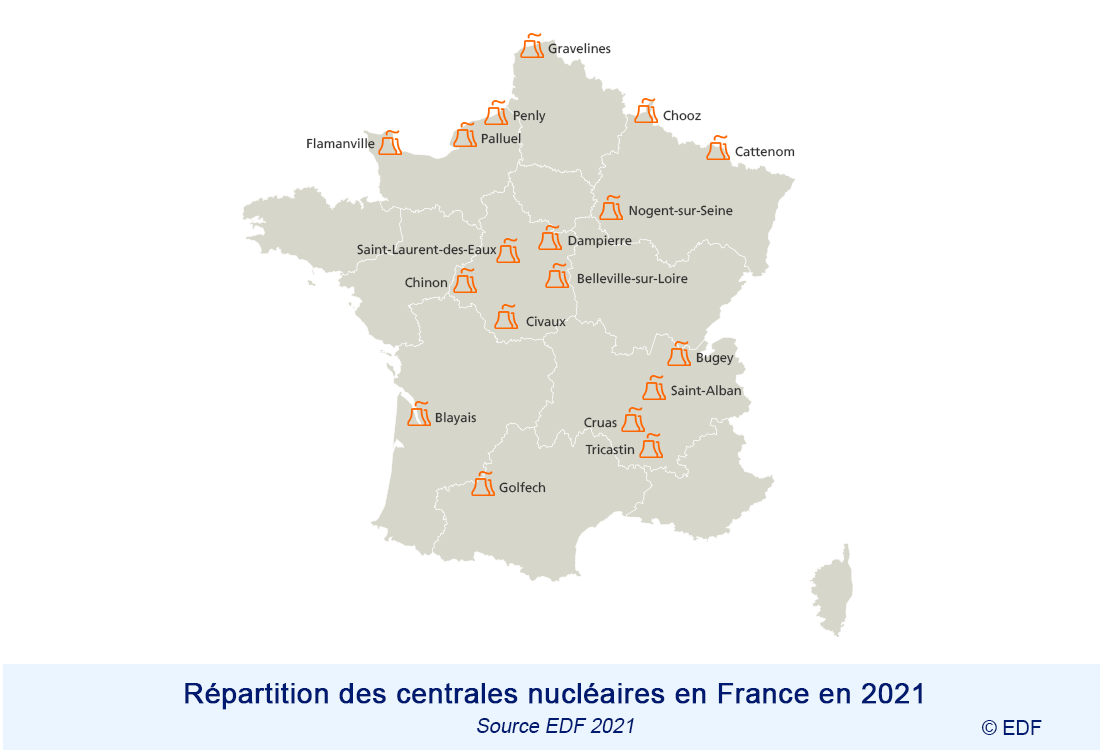

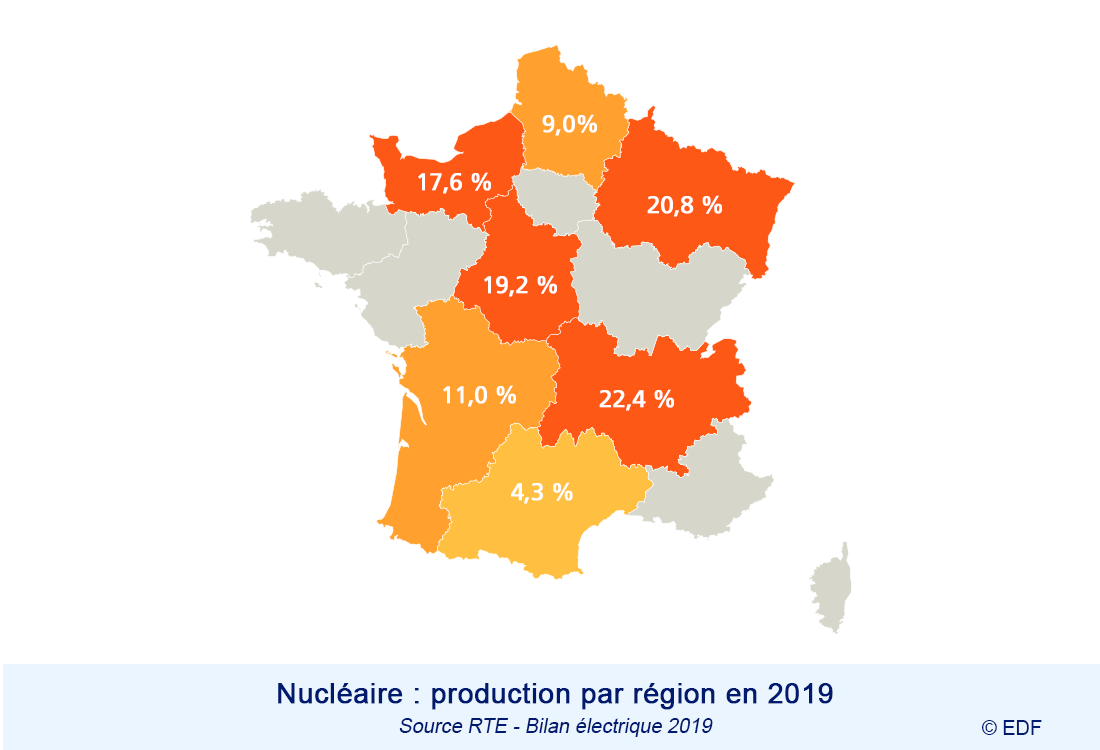

* Ainsi les régions Bretagne, Bourgogne-Franche-Comté, Pays de la Loire,Provence-Alpes-Côte d'Azur et Île-de-France ne produisent pas d'énergies de sources nucléaire et par conséquent les Nans populant cette colonne par région peuvent etre misent en valeur =0

In [23]:
DF1.groupby('Région').sum()

,Code INSEE région,An,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Région,,,,,,,,,,,,,
Auvergne-Rhône-Alpes,13007148,312314787,995519,2435471,1.160508e+09,34805886.0,1.466156e+09,17191052.0,17310301.0,499669245.0,-68068239.0,16176393.0,-8.227807e+08
Bourgogne-Franche-Comté,4180869,312314787,995519,2435471,3.756287e+08,12771353.0,0.000000e+00,19543640.0,4908877.0,14841644.0,-469142.0,4095849.0,3.198937e+08
Bretagne,8206891,312314787,995519,2435471,3.929159e+08,11315474.0,0.000000e+00,29996278.0,3841691.0,10226757.0,-1036817.0,6062949.0,3.324768e+08
Centre-Val de Loire,3716328,312314787,995519,2435471,3.312364e+08,6010711.0,1.289723e+09,37428407.0,5407679.0,2105949.0,0.0,8002954.0,-1.017482e+09
Grand Est,6813268,312314787,995519,2435471,8.017344e+08,156865630.0,1.356512e+09,104367401.0,11551508.0,147751373.0,-16897693.0,14292058.0,-9.727833e+08
Hauts-de-France,4955104,312314787,995519,2435471,8.913382e+08,140194098.0,5.885029e+08,117095084.0,2735419.0,221498.0,0.0,16563385.0,2.595064e+07
Normandie,4335716,312314787,995519,2435471,4.924425e+08,68238044.0,1.050878e+09,24971163.0,2626727.0,2182074.0,0.0,8186373.0,-6.647009e+08
Nouvelle-Aquitaine,11613525,312314787,995519,2435471,7.625612e+08,15151572.0,7.504022e+08,25504572.0,43740528.0,64984583.0,0.0,25104619.0,-1.624133e+08
Occitanie,11768372,312314787,995519,2435471,6.582254e+08,4956833.0,3.059489e+08,51748633.0,36036816.0,202632369.0,-34017175.0,12585419.0,7.835378e+07


* Vérifions la quantité de Nans par régions

In [24]:
DF1[(DF1['Région'] == 'Pays de la Loire') & (DF1['Nucléaire (MW)'].isna()==True)]

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
13,52,Pays de la Loire,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,3595.0,127.0,NaN,182.0,0.0,0.0,NaN,32.0,3252.0
27,52,Pays de la Loire,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,3359.0,126.0,NaN,138.0,0.0,0.0,NaN,29.0,3063.0
40,52,Pays de la Loire,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,3313.0,126.0,NaN,122.0,0.0,1.0,NaN,29.0,3034.0
49,52,Pays de la Loire,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,3383.0,125.0,NaN,125.0,0.0,1.0,NaN,28.0,3103.0
64,52,Pays de la Loire,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,3146.0,126.0,NaN,127.0,0.0,1.0,NaN,29.0,2862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858118,52,Pays de la Loire,2021,10,31,2021-10-31,21:30,2021-10-31T21:30:00+01:00,2401.0,13.0,NaN,533.0,0.0,1.0,NaN,57.0,1796.0
1858130,52,Pays de la Loire,2021,10,31,2021-10-31,22:00,2021-10-31T22:00:00+01:00,2357.0,14.0,NaN,566.0,0.0,1.0,NaN,53.0,1722.0
1858140,52,Pays de la Loire,2021,10,31,2021-10-31,22:30,2021-10-31T22:30:00+01:00,2498.0,14.0,NaN,505.0,0.0,1.0,NaN,55.0,1922.0
1858157,52,Pays de la Loire,2021,10,31,2021-10-31,23:00,2021-10-31T23:00:00+01:00,2871.0,15.0,NaN,463.0,0.0,1.0,NaN,56.0,2335.0


In [25]:
DF1[(DF1['Région'] == 'Bretagne') & (DF1['Nucléaire (MW)'].isna()==True)]

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
19,53,Bretagne,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,3050.0,58.0,NaN,107.0,0.0,86.0,-1.0,20.0,2779.0
28,53,Bretagne,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,2866.0,58.0,NaN,112.0,0.0,163.0,-1.0,20.0,2512.0
42,53,Bretagne,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,2735.0,58.0,NaN,125.0,0.0,197.0,-1.0,20.0,2334.0
53,53,Bretagne,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,2874.0,58.0,NaN,139.0,0.0,202.0,-1.0,20.0,2454.0
62,53,Bretagne,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,2856.0,58.0,NaN,157.0,0.0,202.0,-1.0,19.0,2419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858121,53,Bretagne,2021,10,31,2021-10-31,21:30,2021-10-31T21:30:00+01:00,2159.0,30.0,NaN,503.0,0.0,139.0,-1.0,47.0,1441.0
1858135,53,Bretagne,2021,10,31,2021-10-31,22:00,2021-10-31T22:00:00+01:00,2249.0,43.0,NaN,466.0,0.0,131.0,-1.0,46.0,1563.0
1858141,53,Bretagne,2021,10,31,2021-10-31,22:30,2021-10-31T22:30:00+01:00,2252.0,46.0,NaN,385.0,0.0,121.0,-1.0,47.0,1654.0
1858154,53,Bretagne,2021,10,31,2021-10-31,23:00,2021-10-31T23:00:00+01:00,2418.0,54.0,NaN,358.0,0.0,102.0,-1.0,47.0,1858.0


* La somme des Nans des 5 régions donne bien 154847 x 5 = 774235 Nans
  Nous pouvons mettre =0 ces valeurs Nans

In [26]:
#DF1[(DF1['Région'] == 'Bretagne') & (DF1['Nucléaire (MW)'].isna()==True)]
#DF1[(DF1['Région'] == 'Bourgogne-Franche-Comté') & (DF1['Nucléaire (MW)'].isna()==True)]
#DF1[(DF1['Région'] == 'Pays de la Loire') & (DF1['Nucléaire (MW)'].isna()==True)]
#DF1[(DF1['Région'] == "Provence-Alpes-Côte d'Azur") & (DF1['Nucléaire (MW)'].isna()==True)]
#DF1[(DF1['Région'] == 'Île-de-France') & (DF1['Nucléaire (MW)'].isna()==True)]

DF1['Nucléaire (MW)']=DF1['Nucléaire (MW)'].fillna(0)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
DF1.isna().sum()

Code INSEE région           0
Région                      0
An                          0
Mois                        0
Jour                        0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)              0
Eolien (MW)                96
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)           809275
Bioénergies (MW)            0
Ech. physiques (MW)         0
dtype: int64

* Analyse des données Nans de la production d'énergie par Eolienne

In [28]:
DF1[DF1['Eolien (MW)'].isna()==True].groupby(['Région']).sum()

,Code INSEE région,An,Mois,Jour,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
Région,,,,,,,,,,,,,
Centre-Val de Loire,1152,96624,576,1297,121952.0,3698.0,437862.0,0.0,152.0,679.0,0.0,1776.0,-354109.0
Île-de-France,528,96624,240,385,299908.0,54.0,0.0,0.0,356.0,0.0,0.0,5681.0,293465.0


In [29]:
DF1[DF1['Eolien (MW)'].isna()==True]

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
73170,11,Île-de-France,2013,5,8,2013-05-08,00:30,2013-05-08T00:30:00+02:00,6705.0,1.0,0.0,NaN,0.0,0.0,NaN,108.0,6590.0
73176,11,Île-de-France,2013,5,8,2013-05-08,01:00,2013-05-08T01:00:00+02:00,6270.0,1.0,0.0,NaN,0.0,0.0,NaN,109.0,6154.0
73188,11,Île-de-France,2013,5,8,2013-05-08,01:30,2013-05-08T01:30:00+02:00,5814.0,1.0,0.0,NaN,0.0,0.0,NaN,109.0,5697.0
73205,11,Île-de-France,2013,5,8,2013-05-08,02:00,2013-05-08T02:00:00+02:00,5591.0,1.0,0.0,NaN,0.0,0.0,NaN,117.0,5468.0
73214,11,Île-de-France,2013,5,8,2013-05-08,02:30,2013-05-08T02:30:00+02:00,5506.0,1.0,0.0,NaN,0.0,0.0,NaN,114.0,5384.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207898,24,Centre-Val de Loire,2013,12,27,2013-12-27,22:00,2013-12-27T22:00:00+01:00,2388.0,77.0,9419.0,NaN,0.0,15.0,NaN,37.0,-7817.0
207903,24,Centre-Val de Loire,2013,12,27,2013-12-27,22:30,2013-12-27T22:30:00+01:00,2353.0,77.0,9365.0,NaN,0.0,15.0,NaN,38.0,-7772.0
207916,24,Centre-Val de Loire,2013,12,27,2013-12-27,23:00,2013-12-27T23:00:00+01:00,2383.0,77.0,9401.0,NaN,0.0,13.0,NaN,40.0,-7761.0
207932,24,Centre-Val de Loire,2013,12,27,2013-12-27,23:30,2013-12-27T23:30:00+01:00,2303.0,77.0,9388.0,NaN,0.0,6.0,NaN,39.0,-7810.0


# Les 48 Nans de Production Eolienne Ile de France
Sont Toutes le 8 Mai 2013 toute la journée. 
Les Productions du 7 et 9 Mai sont quasi-nulles comme le montre le dataset


In [30]:
#Production Eolienne du 7 mai 2013
EOL_IDF1=DF1[(DF1['Région'] == 'Île-de-France') & (DF1['An']==2013) & (DF1['Mois']==5) & (DF1['Jour']==7)]
EOL_IDF1

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
72585,11,Île-de-France,2013,5,7,2013-05-07,00:00,2013-05-07T00:00:00+02:00,7276.0,1.0,0.0,0.0,0.0,0.0,NaN,121.0,7153.0
72594,11,Île-de-France,2013,5,7,2013-05-07,00:30,2013-05-07T00:30:00+02:00,6979.0,1.0,0.0,0.0,0.0,0.0,NaN,116.0,6861.0
72602,11,Île-de-France,2013,5,7,2013-05-07,01:00,2013-05-07T01:00:00+02:00,6444.0,1.0,0.0,0.0,0.0,0.0,NaN,120.0,6322.0
72623,11,Île-de-France,2013,5,7,2013-05-07,01:30,2013-05-07T01:30:00+02:00,6077.0,1.0,0.0,0.0,0.0,0.0,NaN,122.0,5953.0
72630,11,Île-de-France,2013,5,7,2013-05-07,02:00,2013-05-07T02:00:00+02:00,5776.0,1.0,0.0,0.0,0.0,0.0,NaN,121.0,5654.0
72640,11,Île-de-France,2013,5,7,2013-05-07,02:30,2013-05-07T02:30:00+02:00,5711.0,1.0,0.0,0.0,0.0,0.0,NaN,122.0,5588.0
72657,11,Île-de-France,2013,5,7,2013-05-07,03:00,2013-05-07T03:00:00+02:00,5624.0,0.0,0.0,0.0,0.0,0.0,NaN,119.0,5503.0
72660,11,Île-de-France,2013,5,7,2013-05-07,03:30,2013-05-07T03:30:00+02:00,5510.0,1.0,0.0,0.0,0.0,0.0,NaN,120.0,5388.0
72677,11,Île-de-France,2013,5,7,2013-05-07,04:00,2013-05-07T04:00:00+02:00,5411.0,1.0,0.0,0.0,0.0,0.0,NaN,121.0,5289.0
72694,11,Île-de-France,2013,5,7,2013-05-07,04:30,2013-05-07T04:30:00+02:00,5469.0,1.0,0.0,0.0,0.0,0.0,NaN,118.0,5349.0


In [31]:
#Production Eolienne du 9 mai 2013
EOL_IDF2=DF1[(DF1['Région'] == 'Île-de-France') & (DF1['An']==2013) & (DF1['Mois']==5) & (DF1['Jour']==9)]
EOL_IDF2

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
73732,11,Île-de-France,2013,5,9,2013-05-09,00:00,2013-05-09T00:00:00+02:00,6703.0,1.0,0.0,NaN,0.0,0.0,NaN,128.0,6567.0
73742,11,Île-de-France,2013,5,9,2013-05-09,00:30,2013-05-09T00:30:00+02:00,6428.0,1.0,0.0,3.0,0.0,0.0,NaN,130.0,6293.0
73752,11,Île-de-France,2013,5,9,2013-05-09,01:00,2013-05-09T01:00:00+02:00,5990.0,1.0,0.0,7.0,0.0,0.0,NaN,131.0,5850.0
73769,11,Île-de-France,2013,5,9,2013-05-09,01:30,2013-05-09T01:30:00+02:00,5670.0,1.0,0.0,4.0,0.0,0.0,NaN,126.0,5536.0
73786,11,Île-de-France,2013,5,9,2013-05-09,02:00,2013-05-09T02:00:00+02:00,5357.0,1.0,0.0,4.0,0.0,0.0,NaN,126.0,5224.0
73789,11,Île-de-France,2013,5,9,2013-05-09,02:30,2013-05-09T02:30:00+02:00,5268.0,1.0,0.0,5.0,0.0,0.0,NaN,128.0,5132.0
73800,11,Île-de-France,2013,5,9,2013-05-09,03:00,2013-05-09T03:00:00+02:00,5100.0,1.0,0.0,1.0,0.0,0.0,NaN,124.0,4972.0
73816,11,Île-de-France,2013,5,9,2013-05-09,03:30,2013-05-09T03:30:00+02:00,4967.0,1.0,0.0,0.0,0.0,0.0,NaN,118.0,4846.0
73824,11,Île-de-France,2013,5,9,2013-05-09,04:00,2013-05-09T04:00:00+02:00,4919.0,1.0,0.0,0.0,0.0,0.0,NaN,124.0,4793.0
73845,11,Île-de-France,2013,5,9,2013-05-09,04:30,2013-05-09T04:30:00+02:00,4905.0,1.0,0.0,0.0,0.0,0.0,NaN,124.0,4779.0


In [32]:
# Mise à valeur =0 des Nans Production Eolienne du 8 Mai 2013
DF1['Eolien (MW)'][DF1['Région']=='Île-de-France'] = DF1['Eolien (MW)'][DF1['Région']=='Île-de-France'].fillna(0)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
DF1[DF1['Eolien (MW)'].isna()==True]

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
207377,24,Centre-Val de Loire,2013,12,27,2013-12-27,00:30,2013-12-27T00:30:00+01:00,2597.0,78.0,9335.0,NaN,0.0,7.0,NaN,36.0,-7441.0
207388,24,Centre-Val de Loire,2013,12,27,2013-12-27,01:00,2013-12-27T01:00:00+01:00,2481.0,78.0,9245.0,NaN,0.0,12.0,NaN,36.0,-7458.0
207396,24,Centre-Val de Loire,2013,12,27,2013-12-27,01:30,2013-12-27T01:30:00+01:00,2601.0,78.0,9312.0,NaN,0.0,12.0,NaN,37.0,-7413.0
207414,24,Centre-Val de Loire,2013,12,27,2013-12-27,02:00,2013-12-27T02:00:00+01:00,2546.0,78.0,9281.0,NaN,0.0,20.0,NaN,36.0,-7447.0
207427,24,Centre-Val de Loire,2013,12,27,2013-12-27,02:30,2013-12-27T02:30:00+01:00,2498.0,78.0,9323.0,NaN,0.0,20.0,NaN,37.0,-7566.0
207434,24,Centre-Val de Loire,2013,12,27,2013-12-27,03:00,2013-12-27T03:00:00+01:00,2400.0,78.0,8438.0,NaN,0.0,16.0,NaN,36.0,-6800.0
207453,24,Centre-Val de Loire,2013,12,27,2013-12-27,03:30,2013-12-27T03:30:00+01:00,2257.0,77.0,8604.0,NaN,0.0,5.0,NaN,37.0,-7107.0
207461,24,Centre-Val de Loire,2013,12,27,2013-12-27,04:00,2013-12-27T04:00:00+01:00,2305.0,74.0,8581.0,NaN,0.0,5.0,NaN,36.0,-7039.0
207477,24,Centre-Val de Loire,2013,12,27,2013-12-27,04:30,2013-12-27T04:30:00+01:00,2243.0,74.0,8612.0,NaN,0.0,5.0,NaN,39.0,-7134.0
207489,24,Centre-Val de Loire,2013,12,27,2013-12-27,05:00,2013-12-27T05:00:00+01:00,2280.0,73.0,8580.0,NaN,0.0,5.0,NaN,39.0,-7079.0


# Les 48 Nans de Production Eolienne:
Sont Toutes le 27 décembre 2013 toute la journée Région Val de loire


https://france3-regions.francetvinfo.fr/pays-de-la-loire/2013/12/27/pays-de-la-loire-pluie-et-vent-partout-384591.html


Pays de la Loire : pluie et vent partout
Publié le 27/12/2013 à 09h27 • Mis à jour le 10/06/2020 à 20h05
Écrit par Christophe Turgis

Nous sommes le 27 décembre, le ciel sera très gris, très venteux et très pluvieux aujourd'hui, des températures douces, 11 à 13°, la pluie va tomber toute la journée, 20 à 30 mm, prévoyez des parapluies solides, 45 km/h de vent en moyenne, 85 en rafale, et nous fêtons Jean


https://france3-regions.francetvinfo.fr/pays-de-la-loire/2013/12/28/pays-de-la-loire-pluie-vent-grele-le-ciel-reste-tres-agite-avant-un-dimanche-plus-agreable-384951.html


Pays de la Loire : pluie, vent, grêle, le ciel reste très agité avant un dimanche plus agréable
Publié le 28/12/2013 à 09h24 • Mis à jour le 10/06/2020 à 20h07
Écrit par Christophe Turgis

Nous sommes le 28 décembre 2013, le ciel sera très agité encore aujourd'hui, de la pluie, du vent en rafale jusqu'à 65 km/h, des averses de grêle cet après-midi, un temps à ne pas mettre le nez dehors, demain dimanche, retour des éclaircies et d'un temps calme, nous fêtons les Innocents

In [34]:
EOL1=DF1[(DF1['Région'] == 'Centre-Val de Loire') & (DF1['An']==2013) & (DF1['Mois']==12) & (DF1['Jour']==26)]

In [35]:
EOL1.head(48)

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
206784,24,Centre-Val de Loire,2013,12,26,2013-12-26,00:00,2013-12-26T00:00:00+01:00,2447.0,72.0,9281.0,194.0,0.0,3.0,NaN,35.0,-7139.0
206802,24,Centre-Val de Loire,2013,12,26,2013-12-26,00:30,2013-12-26T00:30:00+01:00,2259.0,74.0,9344.0,184.0,0.0,3.0,NaN,35.0,-7382.0
206809,24,Centre-Val de Loire,2013,12,26,2013-12-26,01:00,2013-12-26T01:00:00+01:00,2255.0,73.0,9183.0,228.0,0.0,3.0,NaN,34.0,-7267.0
206820,24,Centre-Val de Loire,2013,12,26,2013-12-26,01:30,2013-12-26T01:30:00+01:00,2273.0,73.0,9435.0,215.0,0.0,3.0,NaN,34.0,-7489.0
206832,24,Centre-Val de Loire,2013,12,26,2013-12-26,02:00,2013-12-26T02:00:00+01:00,2169.0,73.0,9387.0,185.0,0.0,4.0,NaN,35.0,-7516.0
206853,24,Centre-Val de Loire,2013,12,26,2013-12-26,02:30,2013-12-26T02:30:00+01:00,2136.0,72.0,9464.0,142.0,0.0,4.0,NaN,35.0,-7582.0
206859,24,Centre-Val de Loire,2013,12,26,2013-12-26,03:00,2013-12-26T03:00:00+01:00,2108.0,72.0,9389.0,110.0,0.0,4.0,NaN,35.0,-7504.0
206869,24,Centre-Val de Loire,2013,12,26,2013-12-26,03:30,2013-12-26T03:30:00+01:00,2032.0,72.0,9456.0,99.0,0.0,4.0,NaN,33.0,-7632.0
206883,24,Centre-Val de Loire,2013,12,26,2013-12-26,04:00,2013-12-26T04:00:00+01:00,2015.0,72.0,9453.0,103.0,0.0,4.0,NaN,33.0,-7651.0
206898,24,Centre-Val de Loire,2013,12,26,2013-12-26,04:30,2013-12-26T04:30:00+01:00,2062.0,72.0,9475.0,105.0,0.0,4.0,NaN,33.0,-7629.0


In [36]:
EOL2=DF1[(DF1['Région'] == 'Centre-Val de Loire') & (DF1['An']==2013) & (DF1['Mois']==12) & (DF1['Jour']==28)]

In [37]:
EOL2.head(48)

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
207947,24,Centre-Val de Loire,2013,12,28,2013-12-28,00:00,2013-12-28T00:00:00+01:00,2392.0,77.0,9425.0,NaN,0.0,6.0,NaN,37.0,-7749.0
207948,24,Centre-Val de Loire,2013,12,28,2013-12-28,00:30,2013-12-28T00:30:00+01:00,2346.0,77.0,9329.0,620.0,0.0,6.0,NaN,37.0,-7724.0
207961,24,Centre-Val de Loire,2013,12,28,2013-12-28,01:00,2013-12-28T01:00:00+01:00,2251.0,77.0,9196.0,628.0,0.0,6.0,NaN,37.0,-7695.0
207980,24,Centre-Val de Loire,2013,12,28,2013-12-28,01:30,2013-12-28T01:30:00+01:00,2286.0,77.0,8497.0,612.0,0.0,6.0,NaN,37.0,-6944.0
207992,24,Centre-Val de Loire,2013,12,28,2013-12-28,02:00,2013-12-28T02:00:00+01:00,2160.0,77.0,8402.0,624.0,0.0,6.0,NaN,38.0,-6989.0
207999,24,Centre-Val de Loire,2013,12,28,2013-12-28,02:30,2013-12-28T02:30:00+01:00,2145.0,77.0,8470.0,621.0,0.0,6.0,NaN,38.0,-7069.0
208012,24,Centre-Val de Loire,2013,12,28,2013-12-28,03:00,2013-12-28T03:00:00+01:00,2137.0,77.0,8401.0,584.0,0.0,6.0,NaN,38.0,-6970.0
208026,24,Centre-Val de Loire,2013,12,28,2013-12-28,03:30,2013-12-28T03:30:00+01:00,1992.0,77.0,7817.0,599.0,0.0,6.0,NaN,37.0,-6547.0
208039,24,Centre-Val de Loire,2013,12,28,2013-12-28,04:00,2013-12-28T04:00:00+01:00,1875.0,77.0,7896.0,590.0,0.0,6.0,NaN,38.0,-6734.0
208054,24,Centre-Val de Loire,2013,12,28,2013-12-28,04:30,2013-12-28T04:30:00+01:00,1897.0,78.0,7956.0,485.0,0.0,6.0,NaN,38.0,-6667.0


* L'énergie produite grâce au vent à la dernière heure de la journée du 26 est très proche que celle produite à la
première heure du 28. Le vent n'est pas constant dans la journée. Le début et la fin de journée ayant des valeurs élevées, une proposition est de considérer un pattern équivalent à la journée du 28, inversé.


In [38]:
index_nan = DF1[(DF1['Eolien (MW)'].isna()==True)].index
print(index_nan)

Int64Index([207377, 207388, 207396, 207414, 207427, 207434, 207453, 207461,
            207477, 207489, 207501, 207510, 207517, 207528, 207540, 207559,
            207573, 207585, 207597, 207600, 207613, 207631, 207647, 207659,
            207660, 207681, 207691, 207704, 207711, 207725, 207740, 207749,
            207761, 207774, 207786, 207797, 207807, 207816, 207828, 207846,
            207854, 207864, 207876, 207898, 207903, 207916, 207932, 207947],
           dtype='int64')


In [39]:
DF1 = DF1.sort_values(by=['Région', 'Date', 'Heure'])
DF1.head()

,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
18,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
35,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
36,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
57,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
60,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


In [40]:
DF1 = DF1.reset_index()
DF1.head()

,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,18,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1,35,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
2,36,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
3,57,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
4,60,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


In [41]:
index_nan = DF1[(DF1['Eolien (MW)'].isna()==True)].index
print(index_nan)


Int64Index([481821, 481822, 481823, 481824, 481825, 481826, 481827, 481828,
            481829, 481830, 481831, 481832, 481833, 481834, 481835, 481836,
            481837, 481838, 481839, 481840, 481841, 481842, 481843, 481844,
            481845, 481846, 481847, 481848, 481849, 481850, 481851, 481852,
            481853, 481854, 481855, 481856, 481857, 481858, 481859, 481860,
            481861, 481862, 481863, 481864, 481865, 481866, 481867, 481868],
           dtype='int64')


In [42]:
index_nan = DF1[(DF1['Eolien (MW)'].isna()==True)&(DF1['Heure']=='00:30')].index
print(index_nan)

Int64Index([481821], dtype='int64')


In [43]:
index_pos=index_nan[0]
index_pos

481821

In [44]:
# Boucle FOR pour attribuer les nouvelles valeurs de la journée de production Eolien du 27
DF1.columns

Index(['index', 'Code INSEE région', 'Région', 'An', 'Mois', 'Jour', 'Date',
       'Heure', 'Date - Heure', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)'],
      dtype='object')

In [45]:
for i in np.arange(48):
    j0 = index_pos+i
    j1 = index_pos+2*48-i
    NRJ = DF1.iloc[j1, 12]
    DF1.iloc[j0, 12] = NRJ

In [46]:
EOL_PATTERN=DF1[(DF1['Région'] == 'Centre-Val de Loire') & (DF1['An']==2013) & (DF1['Mois']==12) & (DF1['Jour']==27)]
EOL_PATTERN

,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
481820,207366,24,Centre-Val de Loire,2013,12,27,2013-12-27,00:00,2013-12-27T00:00:00+01:00,2649.0,78.0,9298.0,557.0,0.0,5.0,NaN,37.0,-7328.0
481821,207377,24,Centre-Val de Loire,2013,12,27,2013-12-27,00:30,2013-12-27T00:30:00+01:00,2597.0,78.0,9335.0,518.0,0.0,7.0,NaN,36.0,-7441.0
481822,207388,24,Centre-Val de Loire,2013,12,27,2013-12-27,01:00,2013-12-27T01:00:00+01:00,2481.0,78.0,9245.0,496.0,0.0,12.0,NaN,36.0,-7458.0
481823,207396,24,Centre-Val de Loire,2013,12,27,2013-12-27,01:30,2013-12-27T01:30:00+01:00,2601.0,78.0,9312.0,500.0,0.0,12.0,NaN,37.0,-7413.0
481824,207414,24,Centre-Val de Loire,2013,12,27,2013-12-27,02:00,2013-12-27T02:00:00+01:00,2546.0,78.0,9281.0,512.0,0.0,20.0,NaN,36.0,-7447.0
481825,207427,24,Centre-Val de Loire,2013,12,27,2013-12-27,02:30,2013-12-27T02:30:00+01:00,2498.0,78.0,9323.0,528.0,0.0,20.0,NaN,37.0,-7566.0
481826,207434,24,Centre-Val de Loire,2013,12,27,2013-12-27,03:00,2013-12-27T03:00:00+01:00,2400.0,78.0,8438.0,521.0,0.0,16.0,NaN,36.0,-6800.0
481827,207453,24,Centre-Val de Loire,2013,12,27,2013-12-27,03:30,2013-12-27T03:30:00+01:00,2257.0,77.0,8604.0,533.0,0.0,5.0,NaN,37.0,-7107.0
481828,207461,24,Centre-Val de Loire,2013,12,27,2013-12-27,04:00,2013-12-27T04:00:00+01:00,2305.0,74.0,8581.0,549.0,0.0,5.0,NaN,36.0,-7039.0
481829,207477,24,Centre-Val de Loire,2013,12,27,2013-12-27,04:30,2013-12-27T04:30:00+01:00,2243.0,74.0,8612.0,557.0,0.0,5.0,NaN,39.0,-7134.0


In [47]:
DF1.isna().sum()

index                       0
Code INSEE région           0
Région                      0
An                          0
Mois                        0
Jour                        0
Date                        0
Heure                       0
Date - Heure                0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)              0
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)           809275
Bioénergies (MW)            0
Ech. physiques (MW)         0
dtype: int64

* Vérification graphique du rendu de la journée estimé du 27

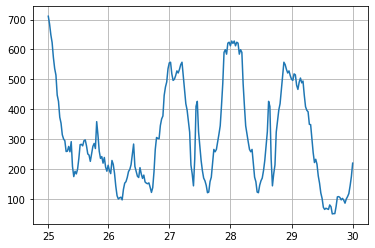

In [48]:
plt.plot(range(5*48),
         DF1['Eolien (MW)'][(DF1['Région']=='Centre-Val de Loire')&(DF1['An']==2013)&(DF1['Mois']==12)&(DF1['Jour']<=29)&(DF1['Jour']>=25)])
plt.xticks(ticks = [0, 47, 95, 143, 191, 239], labels = [25, 26, 27, 28, 29, 30])
plt.grid();


* Données POMPAGE

https://www.connaissancedesenergies.org/fiche-pedagogique/hydroelectricite-stations-de-transfert-d-energie-par-pompage-step

* Hydroélectricité : stations de transfert d’énergie par pompage (STEP) 


Les stations de transfert d’énergie par pompage (STEP), ou « pumped storage power plants » (PSP) en anglais, sont un type particulier d’installations hydroélectriques. Composées de deux bassins situés à des altitudes différentes, elles permettent de stocker de l’énergie en pompant l’eau du bassin inférieur vers le bassin supérieur lorsque la demande électrique est faible (et le prix de l’électricité peu élevé). Lorsque la demande électrique augmente (tout comme le prix de l’électricité), elles restituent de l’électricité sur le réseau en turbinant l’eau du bassin supérieur.

Grâce à leur fonction de stockage, ces installations contribuent à maintenir l’équilibre entre production et consommation sur le réseau électrique, tout en limitant les coûts de production lors des pics de consommation. A l’heure actuelle, le transfert d’énergie par pompage hydraulique est la technique la plus mature de stockage stationnaire de l’énergie.

Une STEP est composée d’un bassin supérieur avec une retenue d’eau et d’un bassin inférieur entre lesquels est placé un groupe hydroélectrique réversible, dit « synchrone ». Ce dernier peut fonctionner comme un ensemble pompe-moteur ou turbine-alternateur. En mode pompe-moteur, il consomme de l’électricité pour pomper l’eau du bassin inférieur vers le bassin supérieur. En mode turbine-alternateur, il produit de l’électricité lors du transfert d’eau du bassin supérieur vers le bassin inférieur.


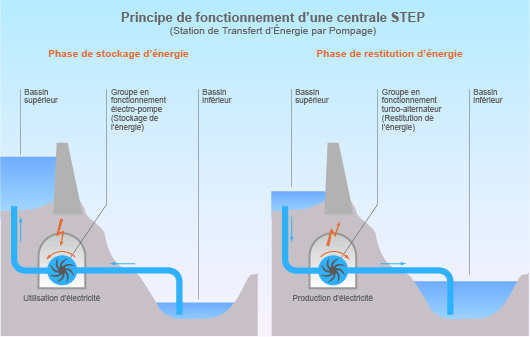

Il existe deux sous-catégories de STEP:

    les STEP « pures » fonctionnant en circuit fermé avec un apport extérieur d’eau nul ou négligeable ;
    les STEP « mixtes » qui reçoivent des flux naturels d’eau provenant de l’extérieur(1). Les deux bassins sont alors situés sur un cours d’eau (délimités par des barrages) ou parallèlement à celui-ci. Ils peuvent pomper et turbiner 4 à 5 fois un volume d’eau avant de le restituer au cours d’eau dont il provient. En France, c'est le cas de la STEP de Grand'Maison : le débit de l’Eau d’Olle est significatif à la fonte des neiges et participe au remplissage de la retenue amont de Grand'Maison et aval du Verney.﻿


Modalités d’intervention

Les STEP peuvent être activées sur des courtes durées (parfois quelques minutes), en tant que capacités électriques d’appoint. Elles consomment plus d’électricité qu’elles n’en produisent et sont activées en dernier recours pour sécuriser le réseau électrique.

On distingue les STEP ayant un potentiel d’utilisation :

    « journalier » lorsque les réservoirs disposent d’une capacité de stockage équivalente à quelques heures de production ;
    « hebdomadaire » lorsque les réservoirs stockent un volume d’eau suffisant pour produire de l’électricité en continu durant plusieurs dizaines d’heures.

Lorsque la demande d’électricité est faible (et le coût de l’électricité peu élevé, essentiellement d’origine nucléaire), la STEP pompe l’eau vers le bassin supérieur afin de stocker de l’énergie. Lorsque la demande d’électricité est forte (et le coût de l’électricité élevé), la STEP turbine l’eau, exploitant son énergie potentielle due au différentiel d’altitude entre les deux bassins. Elle restitue ainsi de l’électricité sur le réseau.

En France, il existe actuellement 6 principales STEP en activité offrant une capacité d’appoint significative au réseau électrique national (par ordre de puissance de turbine) :

    Grand’Maison en Isère, d’une puissance en turbine de 1 790 MW ;
    Montézic dans l’Aveyron (910 MW) ;
    Super-Bissorte en Savoie (730 MW) ;
    Revin dans les Ardennes (720 MW) ;
    Le Cheylas en Isère (460 MW)
    La Coche en Savoie (330 MW).


* Nous pouvons considerer de ces informations qu'entres le nombre de STEP en France et leurs intermittances de fonctionnement, toutes les valeurs Nans de cette colonne peuvent etre misent à 0

In [49]:
DF1['Pompage (MW)'] = DF1['Pompage (MW)'].fillna(0)


In [50]:
DF1.isna().sum()

index                  0
Code INSEE région      0
Région                 0
An                     0
Mois                   0
Jour                   0
Date                   0
Heure                  0
Date - Heure           0
Consommation (MW)      0
Thermique (MW)         0
Nucléaire (MW)         0
Eolien (MW)            0
Solaire (MW)           0
Hydraulique (MW)       0
Pompage (MW)           0
Bioénergies (MW)       0
Ech. physiques (MW)    0
dtype: int64

In [51]:
DF1.head()

,index,Code INSEE région,Région,An,Mois,Jour,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW)
0,18,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,00:30,2013-01-01T00:30:00+01:00,8173.0,252.0,12069.0,257.0,0.0,3079.0,-4.0,68.0,-7551.0
1,35,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:00,2013-01-01T01:00:00+01:00,7944.0,252.0,11895.0,257.0,0.0,2828.0,-328.0,67.0,-7029.0
2,36,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,01:30,2013-01-01T01:30:00+01:00,7896.0,252.0,12228.0,247.0,0.0,2710.0,-327.0,65.0,-7282.0
3,57,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:00,2013-01-01T02:00:00+01:00,7882.0,251.0,12274.0,244.0,0.0,2516.0,-328.0,66.0,-7144.0
4,60,84,Auvergne-Rhône-Alpes,2013,1,1,2013-01-01,02:30,2013-01-01T02:30:00+01:00,7909.0,251.0,12228.0,245.0,0.0,2440.0,-406.0,67.0,-6920.0


# Le dataset est nettoyé

In [52]:
DF1.to_csv('./dataset/ENERGIE.csv')